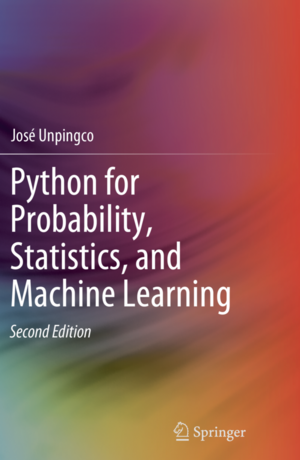

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

<!-- new sections -->
<!-- Ensemble learning -->
<!-- - Machine Learning Flach, Ch.11 -->
<!-- - Machine Learning Mohri, pp.135- -->
<!-- - Data Mining Witten, Ch. 8 -->


With the exception of the random forest, we have so far considered machine
learning models as stand-alone entities. Combinations of models that jointly
produce a classification are known as *ensembles*.  There are two main
methodologies that create ensembles: *bagging* and *boosting*.

## Bagging

Bagging refers to bootstrap aggregating, where bootstrap here is the same as we
discussed in the section [ch:stats:sec:boot](#ch:stats:sec:boot).  Basically,
we resample the data with replacement and then train a classifier on the newly
sampled data. Then, we combine the outputs of each of the individual
classifiers using a majority-voting scheme (for discrete outputs) or a weighted
average (for continuous outputs).  This combination is particularly effective
for models that are easily influenced by a single data element. The resampling
process means that these elements cannot appear in every bootstrapped
training set so that some of the models will not suffer these effects. This
makes the so-computed combination of outputs less volatile. Thus, bagging
helps reduce the collective variance of individual high-variance models.

To get a sense of bagging, let's suppose we have a two-dimensional plane that
is partitioned into two regions with the following boundary: $y=-x+x^2$.
Pairs of $(x_i,y_i)$ points above this boundary are labeled one and points
below are labeled zero. [Figure](#fig:ensemble_001) shows the two regions 
with the  nonlinear separating boundary as the black curved line. 

<!-- dom:FIGURE: [fig-machine_learning/ensemble_001.png, width=500 frac=0.75] Two regions in the plane are separated by a nonlinear boundary. The training data is sampled from this plane. The objective is to correctly classify the so-sampled data.   <div id="fig:ensemble_001"></div> -->
<!-- begin figure -->
<div id="fig:ensemble_001"></div>

<p>Two regions in the plane are separated by a nonlinear boundary. The training data is sampled from this plane. The objective is to correctly classify the so-sampled data.</p>
<img src="fig-machine_learning/ensemble_001.png" width=500>

<!-- end figure -->




The problem is to take samples from each of these regions
and classify them correctly using a perceptron (see the section [ch:ml:sec:perceptron](#ch:ml:sec:perceptron)). A perceptron
is the simplest possible linear classifier that finds a line
in the plane to separate two purported categories. Because
the separating boundary is nonlinear, there is no way that
the perceptron can completely solve this problem. The
following code sets up the perceptron available in
Scikit-learn.

In [2]:
from sklearn.linear_model import Perceptron
p=Perceptron()
p

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

 The training data and the resulting perceptron separating boundary
are shown in [Figure](#fig:ensemble_002). The circles and crosses are the
sampled training data and the gray separating line is the perceptron's
separating boundary between the two categories. The black squares are those
elements in the training data that the perceptron mis-classified. Because the
perceptron can only produce linear separating boundaries, and the boundary in
this case is non-linear, the perceptron makes mistakes near where the
boundary curves.  The next step is to see how bagging can
improve upon this by using multiple perceptrons.

<!-- dom:FIGURE: [fig-machine_learning/ensemble_002.png, width=500 frac=0.75] The perceptron finds the best linear boundary between the two classes. <div id="fig:ensemble_002"></div> -->
<!-- begin figure -->
<div id="fig:ensemble_002"></div>

<p>The perceptron finds the best linear boundary between the two classes.</p>
<img src="fig-machine_learning/ensemble_002.png" width=500>

<!-- end figure -->


The following code sets up the bagging classifier in Scikit-learn. Here we
select only three perceptrons. [Figure](#fig:ensemble_003) shows each of the
three individual classifiers and the final bagged classifer in the panel on the
bottom right. As before, the black circles indicate misclassifications in the
training data. Joint classifications are determined by majority voting.

In [3]:
from sklearn.ensemble import BaggingClassifier
bp = BaggingClassifier(Perceptron(),max_samples=0.50,n_estimators=3)
bp

BaggingClassifier(base_estimator=Perceptron(alpha=0.0001, class_weight=None,
                                            early_stopping=False, eta0=1.0,
                                            fit_intercept=True, max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty=None, random_state=0,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=3, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

<!-- dom:FIGURE: [fig-machine_learning/ensemble_003.png, width=500 frac=0.85] Each panel with the single gray line is one of the perceptrons used for the ensemble bagging classifier on the lower right. <div id="fig:ensemble_003"></div> -->
<!-- begin figure -->
<div id="fig:ensemble_003"></div>

<p>Each panel with the single gray line is one of the perceptrons used for the ensemble bagging classifier on the lower right.</p>
<img src="fig-machine_learning/ensemble_003.png" width=500>

<!-- end figure -->


The `BaggingClassifier` can estimate its own out-of-sample error if passed the
`oob_score=True` flag upon construction. This keeps track of which samples were
used for training and which were not, and then estimates the out-of-sample
error using those samples that were unused in training. The `max_samples`
keyword argument specifies the number of items from the training set to use for
the base classifier. The smaller the `max_samples` used in the bagging
classifier, the better the out-of-sample error estimate, but at the cost of
worse in-sample performance. Of course, this depends on the overall number of
samples and the degrees-of-freedom in each individual classifier. The
VC-dimension surfaces again!  

## Boosting


As we discussed, bagging is particularly effective for individual high-variance
classifiers because the final majority-vote tends to smooth out the individual
classifiers and produce a more stable collaborative solution. On the other
hand, boosting is particularly effective for high-bias classifiers that are
slow to adjust to new data. On the one hand, boosting is similiar to bagging in
that it uses a majority-voting (or averaging for numeric prediction) process at
the end; and it also combines individual classifiers of the same type. On the
other hand, boosting is serially iterative, whereas the individual classifiers
in bagging can be trained in parallel.  Boosting uses the misclassifications of
prior iterations to influence the training of the next iterative classifier by
weighting those misclassifications more heavily in subsequent steps. This means
that, at every step, boosting focuses more and more on specific
misclassifications up to that point, letting the prior classifications
be carried by earlier iterations. 


The primary implementation for boosting in Scikit-learn is the Adaptive
Boosting (*AdaBoost*) algorithm, which does classification
(`AdaBoostClassifier`) and regression (`AdaBoostRegressor`).  The first step in
the basic AdaBoost algorithm is to initialize the weights over each of the
training set indicies, $D_0(i)=1/n$ where there are $n$ elements in the
training set. Note that this creates a discrete uniform distribution over the
*indicies*, not over the training data $\lbrace (x_i,y_i) \rbrace$ itself. In
other words, if there are repeated elements in the training data, then each
gets its own weight. The next step is to train the base classifer $h_k$ and
record the classification error at the $k^{th}$ iteration, $\epsilon_k$. Two
factors can next be calculated using $\epsilon_k$,

$$
\alpha_k = \frac{1}{2}\log \frac{1-\epsilon_k}{\epsilon_k}
$$

 and the normalization factor,

$$
Z_k = 2 \sqrt{ \epsilon_k (1- \epsilon_k) }
$$

 For the next step, the weights over the training data are updated as
in the following,

$$
D_{k+1}(i) = \frac{1}{Z_k} D_k(i)\exp{(-\alpha_k y_i h_k(x_i))}
$$

 The final classification result is assembled using the $\alpha_k$
factors, $g = \sgn(\sum_{k} \alpha_k h_k)$. 

To re-do the problem above using boosting with perceptrons, we set up the
AdaBoost classifier in the following,

In [4]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(Perceptron(),n_estimators=3,
                       algorithm='SAMME',
                       learning_rate=0.5)
clf

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=Perceptron(alpha=0.0001, class_weight=None,
                                             early_stopping=False, eta0=1.0,
                                             fit_intercept=True, max_iter=1000,
                                             n_iter_no_change=5, n_jobs=None,
                                             penalty=None, random_state=0,
                                             shuffle=True, tol=0.001,
                                             validation_fraction=0.1, verbose=0,
                                             warm_start=False),
                   learning_rate=0.5, n_estimators=3, random_state=None)

 The `learning_rate` above controls how aggressively the weights are
updated. The resulting classification boundaries for the embedded perceptrons
are shown in [Figure](#fig:ensemble_004). Compare this to the lower right
panel in  [Figure](#fig:ensemble_003). The performance for both cases is about
the same.  

<!-- dom:FIGURE: [fig-machine_learning/ensemble_004.png, width=500 frac=0.75] The individual perceptron classifiers embedded in the AdaBoost classifier are shown along with the mis-classified points (in black). Compare this to the lower right panel of [Figure](#fig:ensemble_003). <div id="fig:ensemble_004"></div> -->
<!-- begin figure -->
<div id="fig:ensemble_004"></div>

<p>The individual perceptron classifiers embedded in the AdaBoost classifier are shown along with the mis-classified points (in black). Compare this to the lower right panel of [Figure](#fig:ensemble_003).</p>
<img src="fig-machine_learning/ensemble_004.png" width=500>

<!-- end figure -->